# Deep_Learning_from_Scratch_2 - part6

#### 딥러닝의 기본적인 내용을 정리하였습니다. 밑바닥부터 시작하는 딥러닝2(사이토 고키 지음)을 참고하였습니다. 

## 7. RNN을 사용한 문장 생성
### 7.1 언어 모델을 사용한 문장 생성
#### 7.1.1 RNN을 사용한 문장 생성의 순서
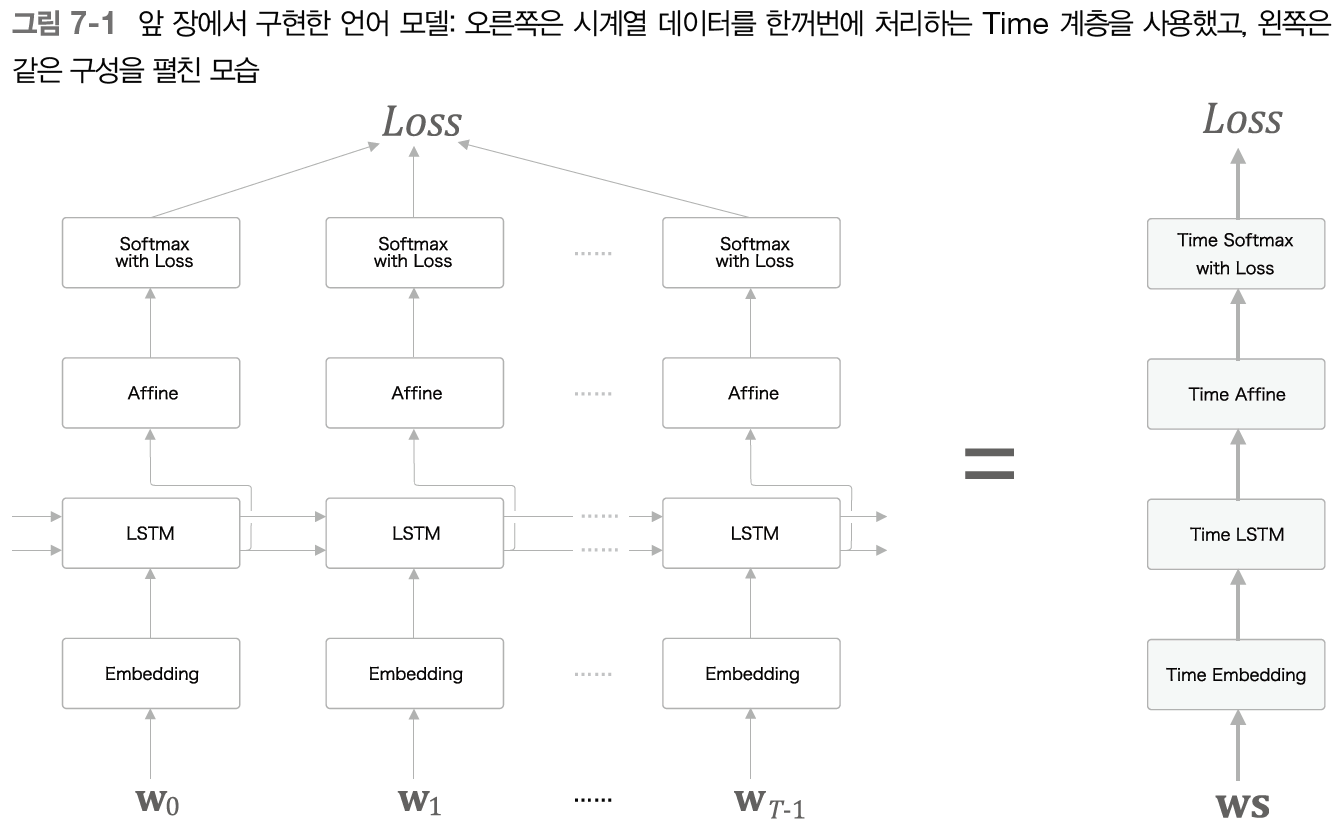
#### - 언어 모델은 지금까지 주어진 단어들에서 다음에 출현하는 단어의 확률분포를 출력
#### - 다음 단어 새로 생성 방법 : 확률이 가장 높은 단어를 선택(결정적 == 결과가 하나로 정해짐, 결과가 예측 가능) / 후보 단어의 확률에 맞게 선택(확률적 == 결과가 확률에 따라 결정)
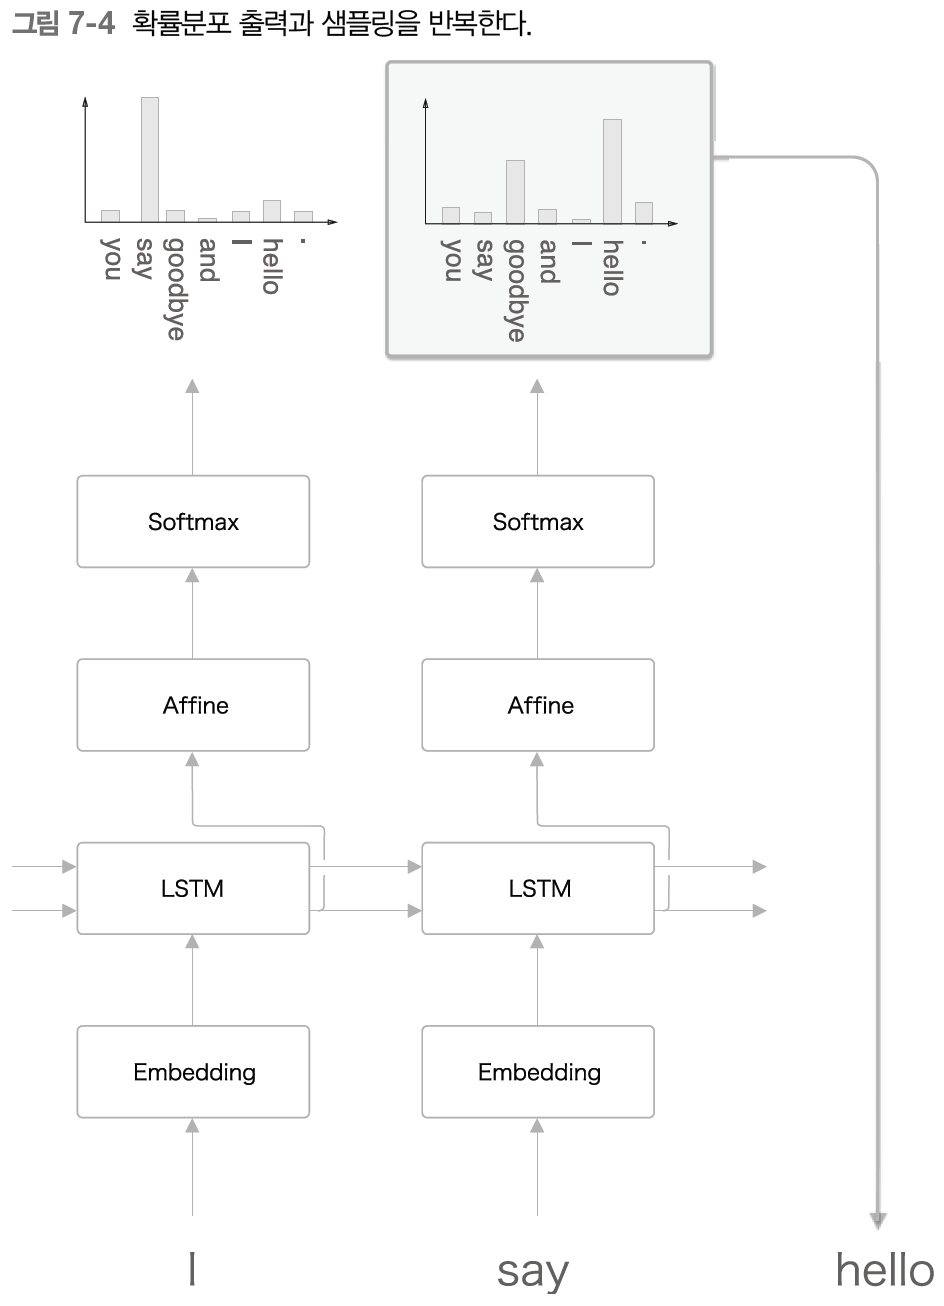
#### - 언어 모델은 훈련 데이터를 암기한 것이 아니라, 훈련 데이터에서 사용된 단어의 정렬 패턴을 학습

#### 7.1.2 문장 생성 구현
#### 7.1.3 더 좋은 문장으로
#### - 더 좋은 언어 모델은 자연스러운 문장을 자유롭게 만들어 낼 수 있음

### 7.2 seq2seq
#### - seq2seq : 2개의 RNN 이용, 시계열 데이터를 다른 시계열 데이터로 변환
#### 7.2.1 seq2seq의 원리
#### - Encoder(입력 데이터를 인코딩, 부호화)-Decoder(인코딩 된 데이터를 디코딩, 복호화) 모델 
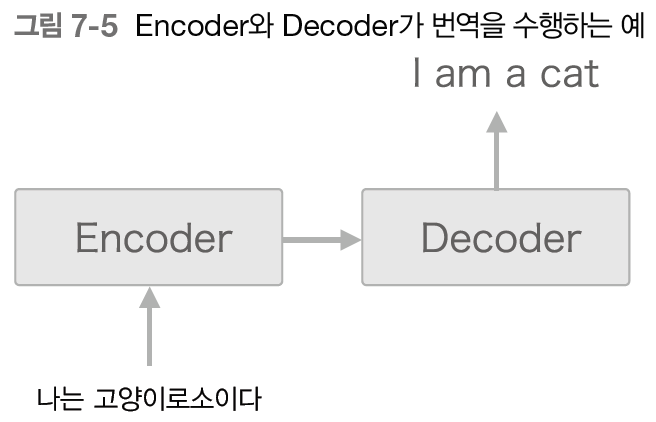
#### - Encoder : RNN을 이용해 시계열 데이터를 h라는 은닉 상태(LSTM 계층의 마지막 은닉 상태, 입력 문장을 번역하는 데 필요한 정보가 인코딩) 벡터(고정 길이 벡터)로 변환
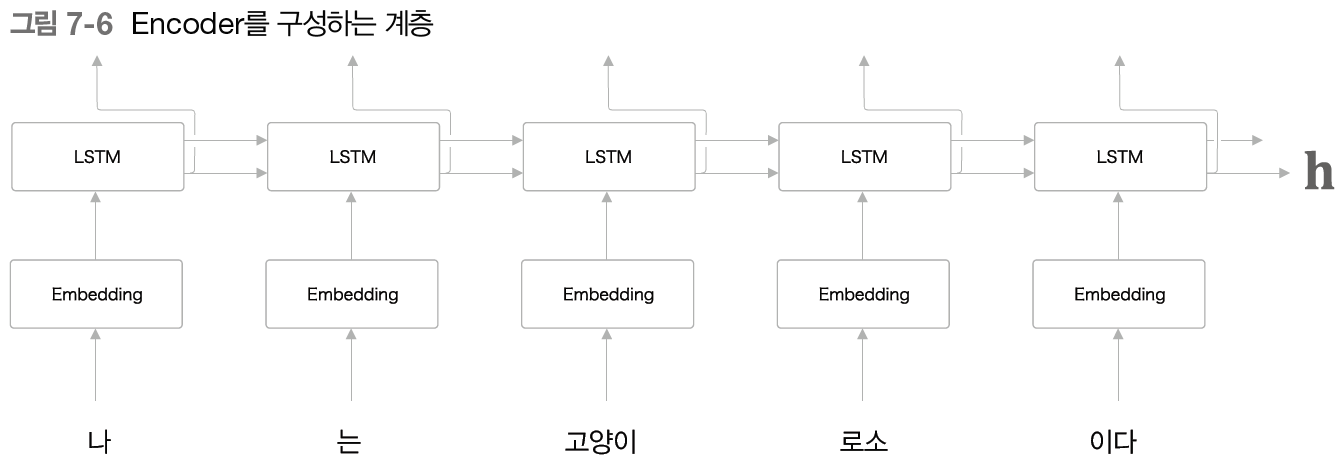
#### - Encoder는 문장을 고정 길이 벡터로 변환
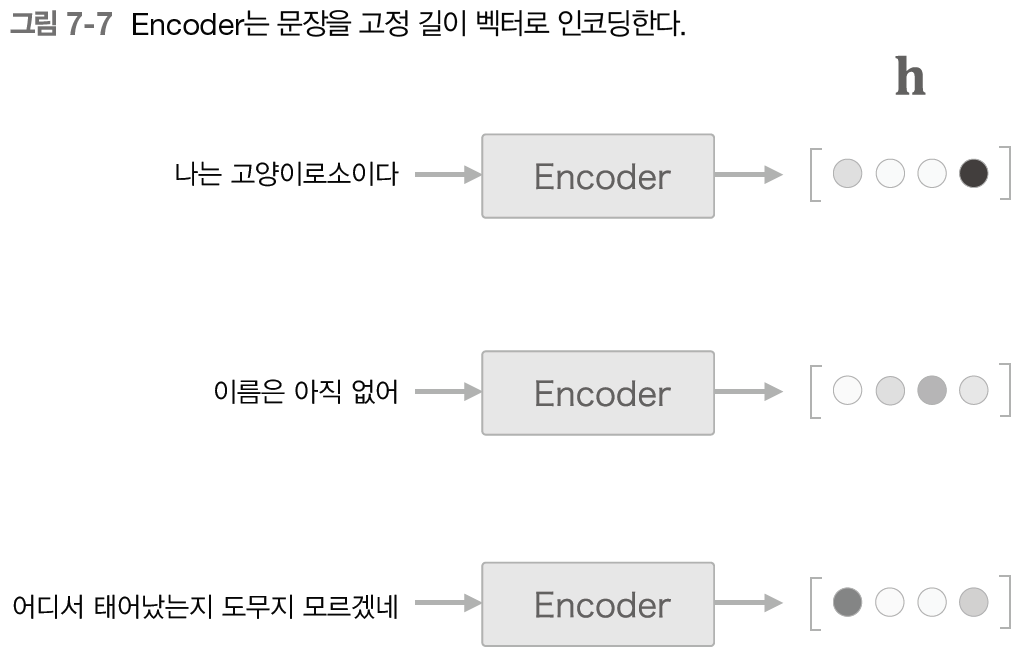
#### - Encoder는 초기 은닉 상태로 아무것도 받지 않고 시작(영벡터를 받음)하지만 Decoder는 Encoder의 출력인 h 벡터를 은닉 상태의 입력으로 받음
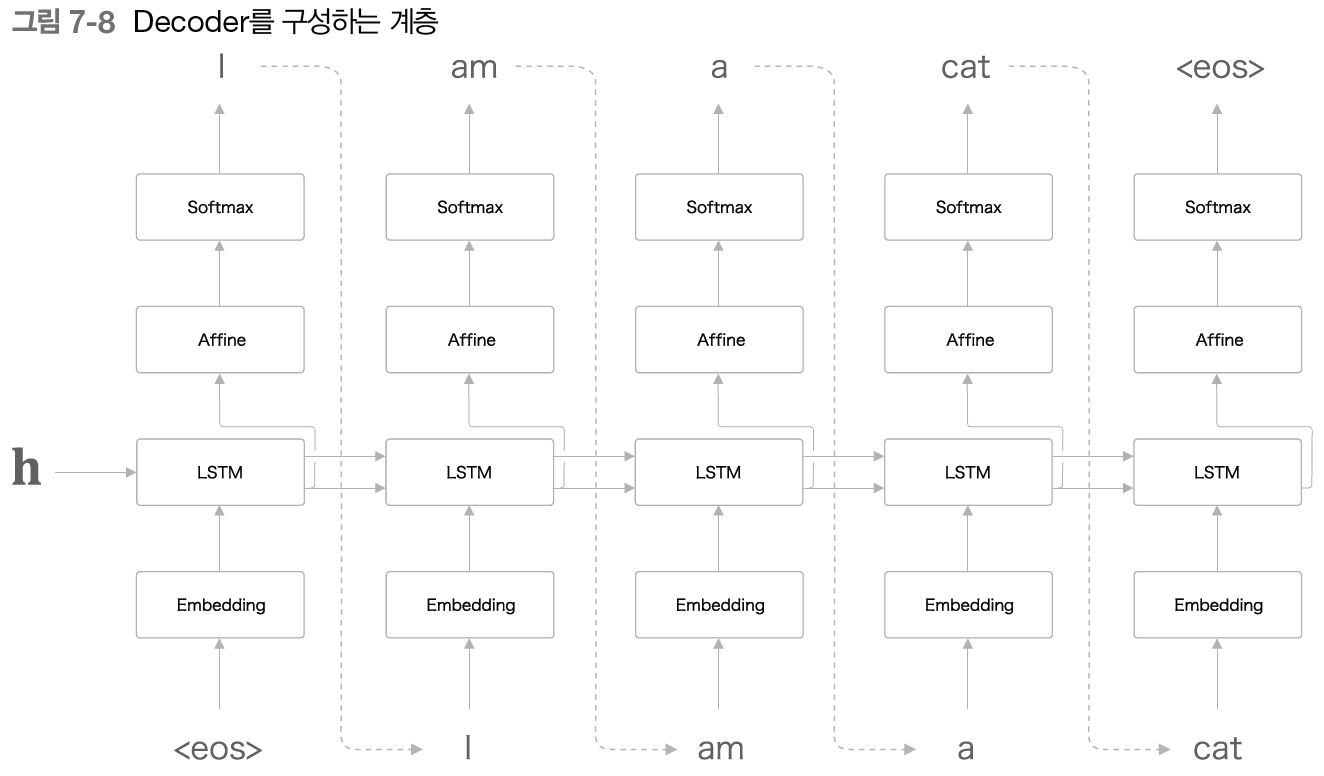
#### - \<eos> : 문장 생성의 시작을 알리는 신호로 이용, Decoder가 \<eos>를 출력할 때까지 단어를 샘플링하도록 하기 위한 종료 신호
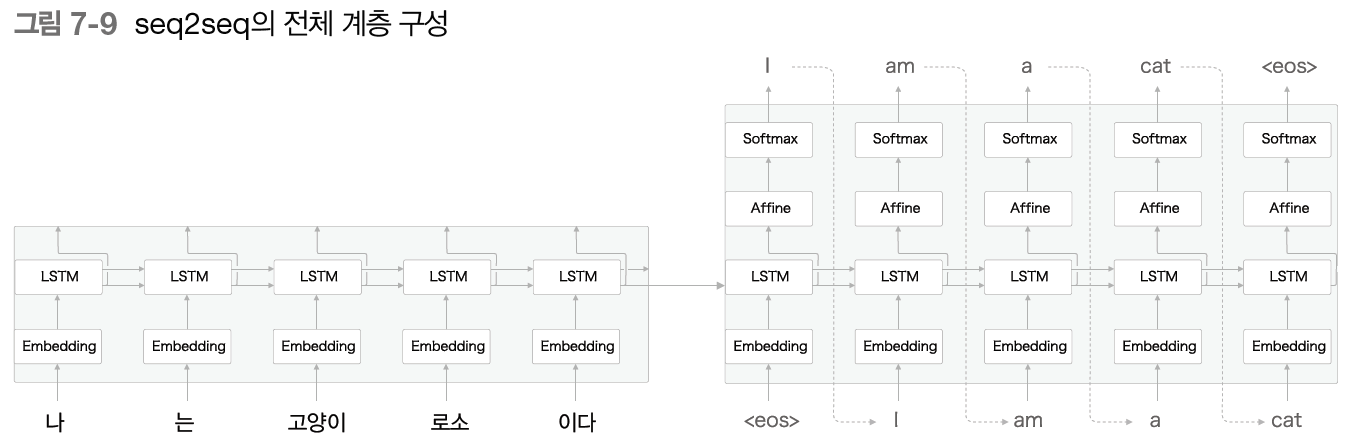
#### - LSTM 계층의 은닉상태가 Encoder와 Decoder를 이어주는 역할을 함

#### 7.2.2 시계열 데이터 변환용 장난감 문제(toy problem)
#### 7.2.3 가변 길이 시계열 데이터
#### - 가변 길이 시계열 데이터를 미니배치로 학습하기 위한 가장 단순한 방법은 패딩
#### - 패딩을 적용해야 하지만 정확성이 중요한 경우 : seq2seq에 패딩 전용 처리 추가 필요 -> Decoder의 입력 데이터가 패딩이면 손실 결과 반영하지 않도록 함(softmax with loss 계층에 마스크 추가)
#### -> Encoder의 입력 데이터가 패딩이면 LSTM 계층이 이전 시각의 입력을 그대로 출력하게 함

#### 7.2.4 덧셈 데이터셋

### 7.3 seq2seq 구현
#### seq2seq는 2개의 RNN을 연결한 신경망
#### 7.3.1 Encoder 클래스 
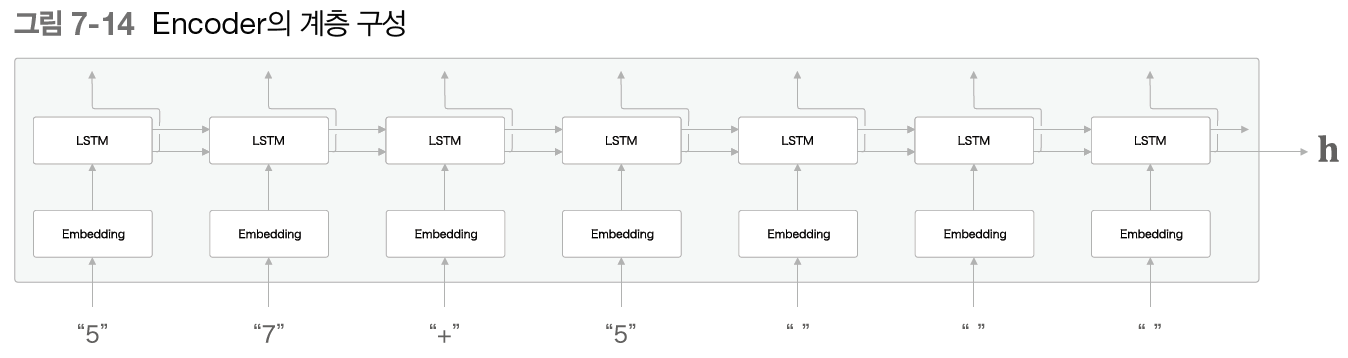
#### - Encoder의 LSTM 은닉 상태만 Decoder로 전달, LSTM의 셀도 Decoder로 전달할 수 있지만 일반적으로 흔치 않음, LSTM의 셀은 자기 자신만 사용한다는 전제로 설계
#### 7.3.2 Decoder 클래스
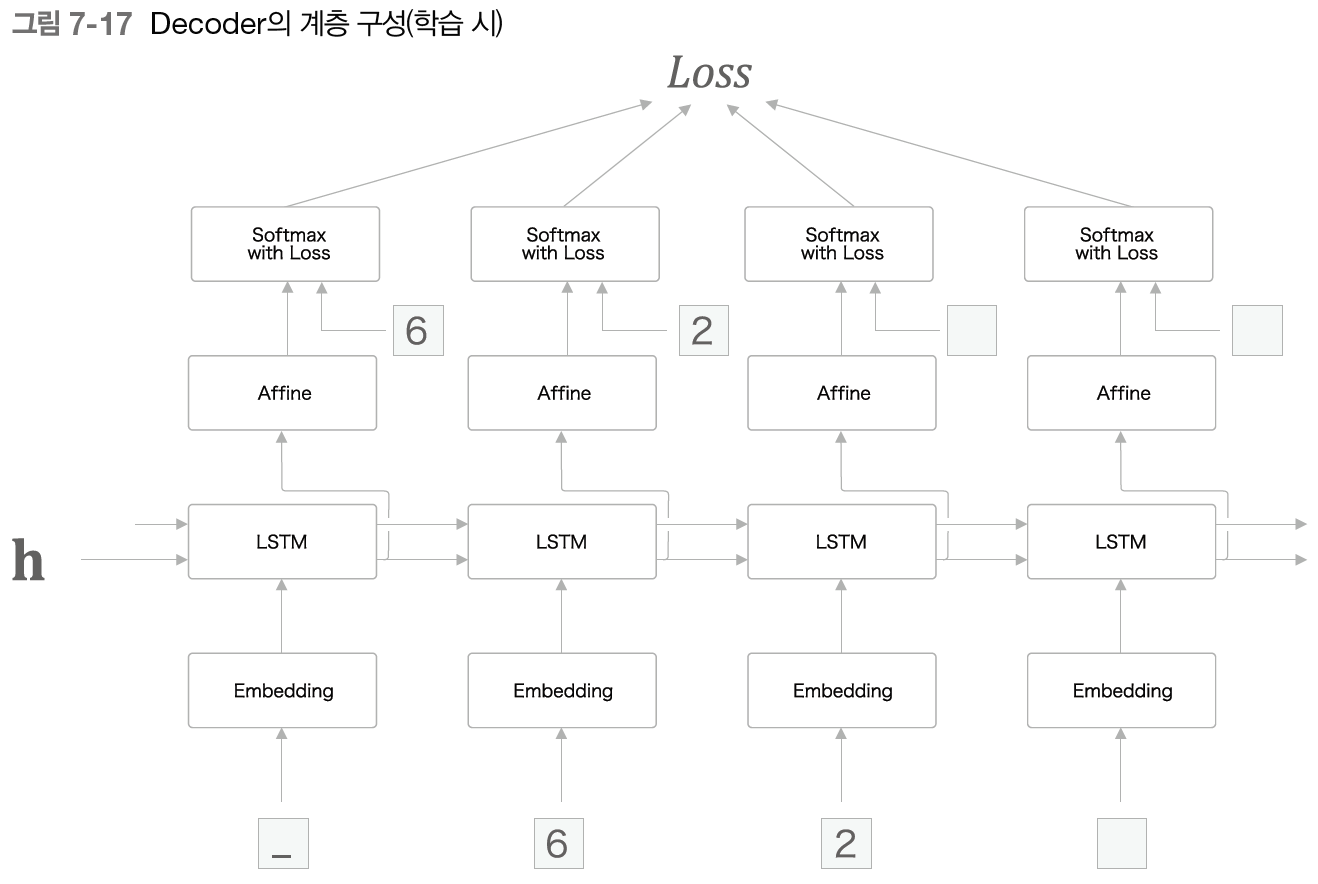
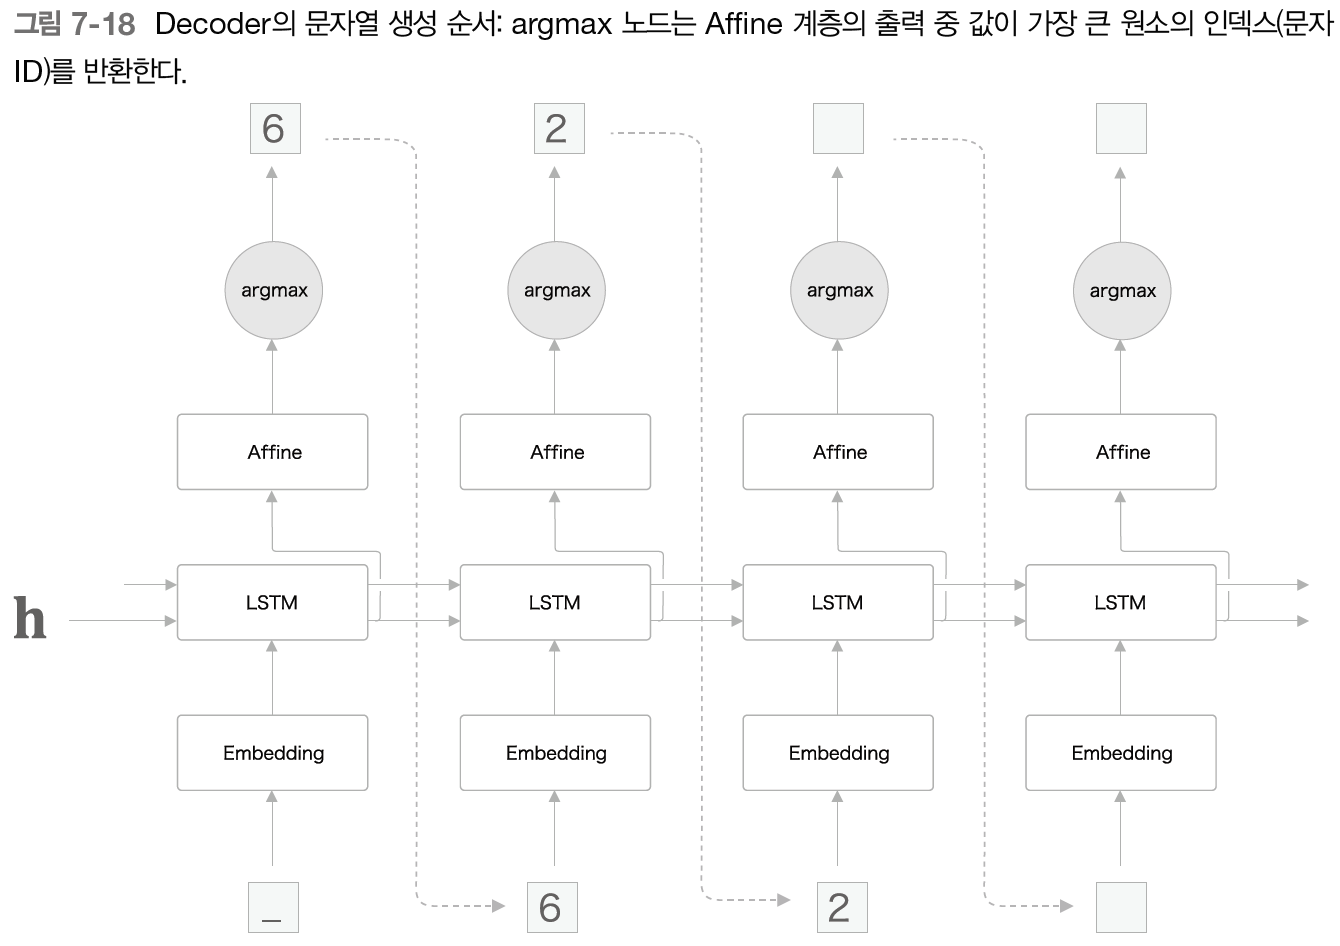
#### 7.3.3 seq2seq 클래스
#### - Encoder 클래스와 Decoder 클래스를 연결하고, Time softmax with loss 계층을 이용해 손실을 계산
#### 7.3.4 seq2seq 평가

### 7.4 seq2seq 개선
#### 7.4.1 입력 데이터 반전(Reverse)
#### - 입력 데이터를 반전시키면 학습 진행이 빨라져서 결과적으로 최종 정확도도 좋아짐 -> 이론적으로는 제대로 밝혀지지 않았지만, 직관적으로는 기울기 전파가 원활해져서 그렇다고 여겨짐
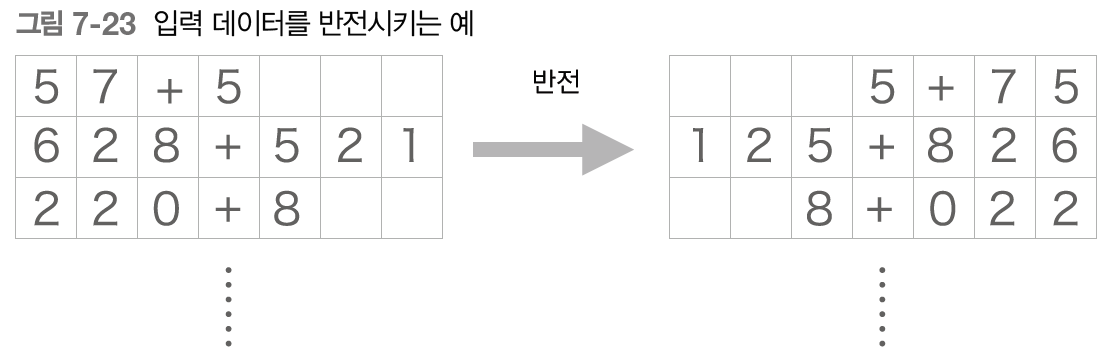
#### 7.4.2 엿보기(peeky)
#### - h를 최초 시각의 LSTM의 입력값으로만 사용하는 것이 아닌, 모든 시각의 Affine, LSTM 계층에 입력값으로 활용
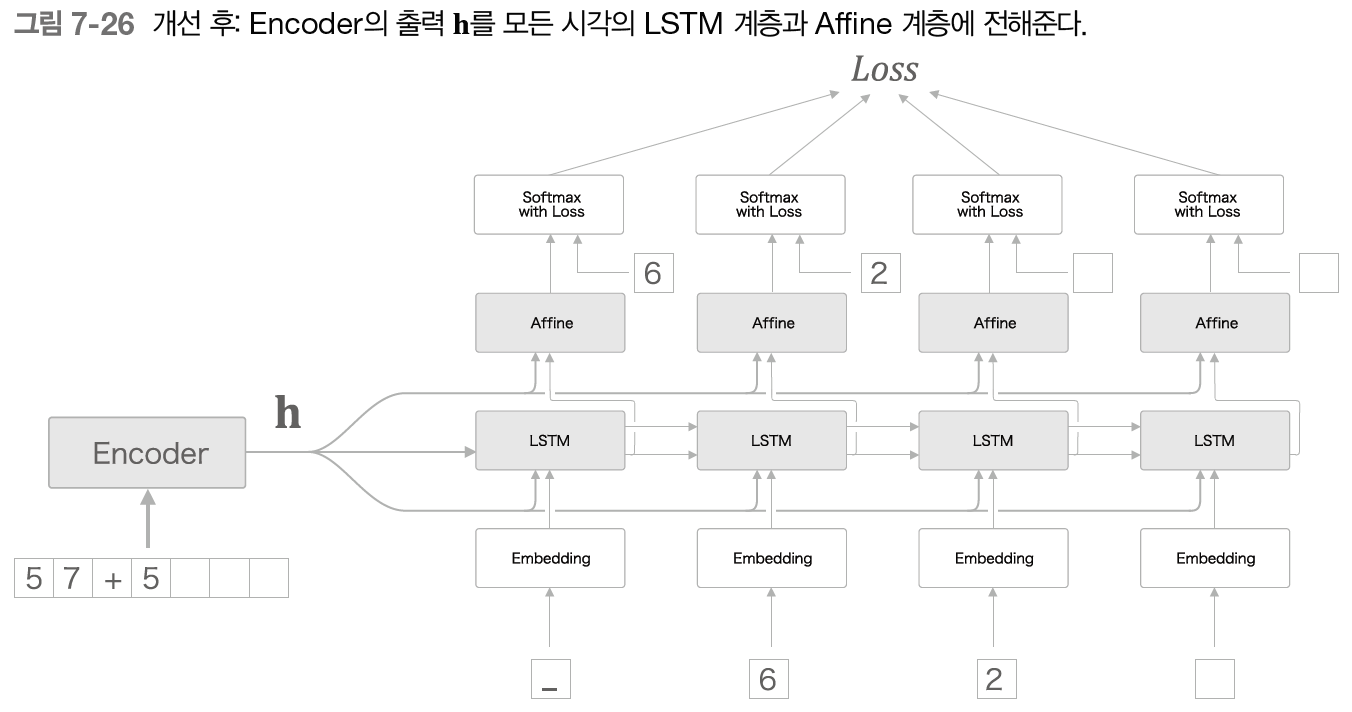
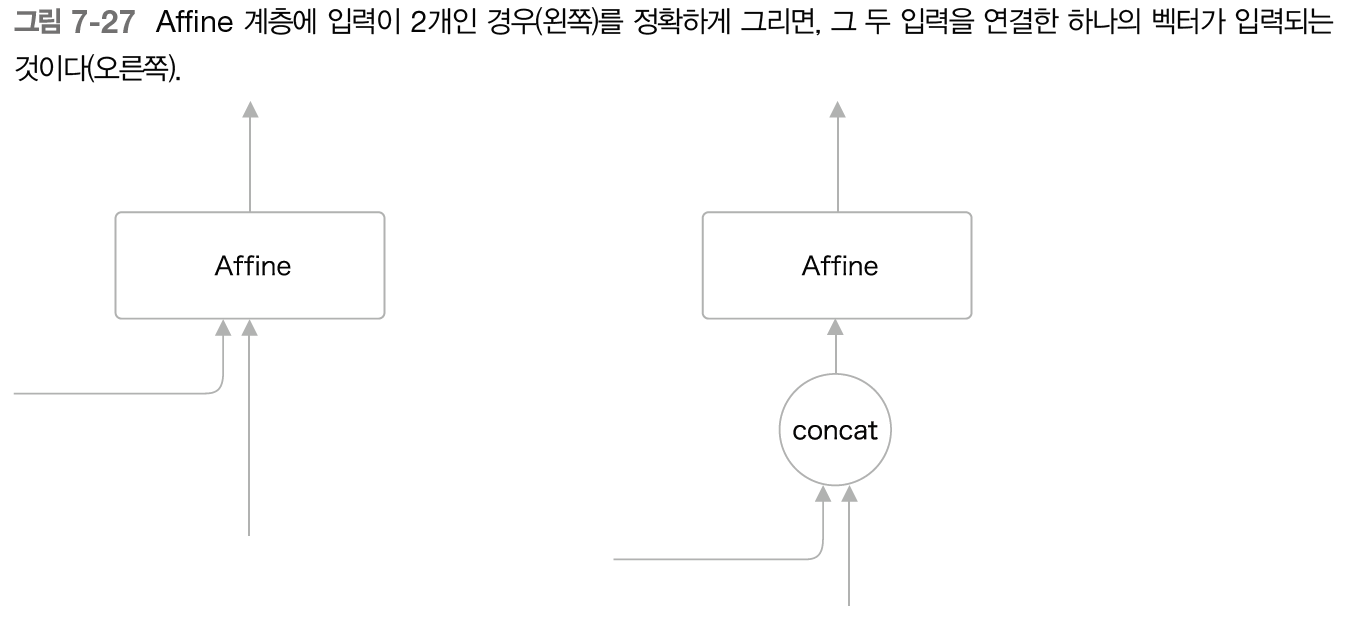

### 7.5 seq2seq를 이용하는 애플리케이션
#### - seq2seq는 한 시계열 데이터를 다른 시계열 데이터로 변환
#### - 기계번역 : 한 언어의 문장을 다른 언어의 문장으로 변환
#### - 자동 요약 : 긴 문장을 짧게 요약된 문장으로 변환
#### - 질의응답 : 질문을 응답으로 변환
#### - 메일 자동 응답 : 받은 메일의 문장을 답변 글로 변환

#### 7.5.1 챗봇
#### 7.5.2 알고리즘 학습
#### 7.5.3 이미지 캡셔닝 : 이미지를 문장으로 변환
#### - Encoder를 LSTM이 아닌 CNN으로 사용 
#### - CNN의 최종 출력은 특징 맵(feature map), 특징 맵은 (높이, 폭, 채널) 3차원이므로 LSTM이 처리할 수 있도록 평탄화(flattening) 필요, 평탄화 후 affine 계층에서 변환